<a href="https://colab.research.google.com/github/salvi007/Yulu_HypothesisTesing/blob/main/Yulu_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,stats,chi2_contingency,levene,kruskal,shapiro,f_oneway,ttest_ind

In [ ]:
df=pd.read_csv("bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.shape  #no of rows is 10886 and no of columns is 12

(10886, 12)

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Humidity has the highes mean and highest median

In [ ]:
df.isna().sum()   #no null values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.nunique()  #Number of unique elements of each column

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

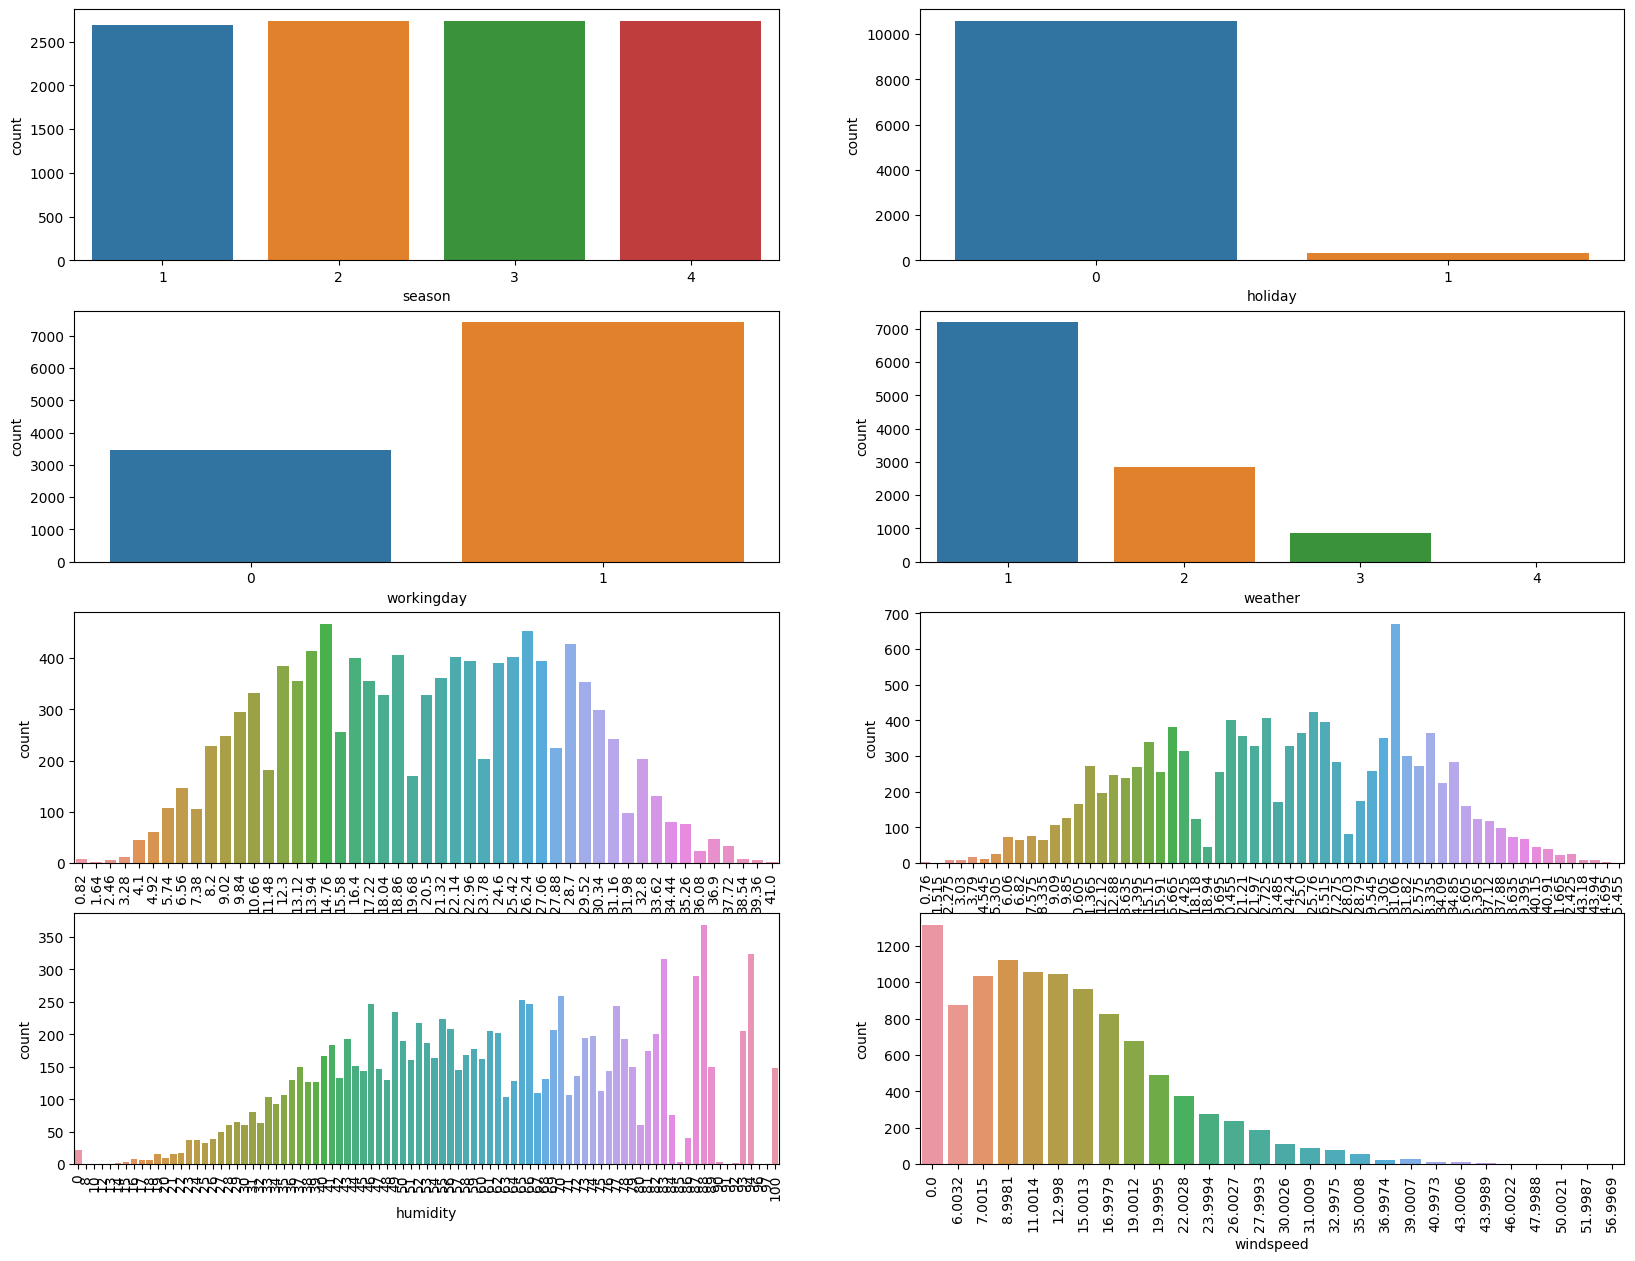

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.countplot(x=df['season'])
plt.subplot(4,2,2)
sns.countplot(x=df['holiday'])
plt.subplot(4,2,3)
sns.countplot(x=df['workingday'])
plt.subplot(4,2,4)
sns.countplot(x=df['weather'])
plt.subplot(4,2,5)
sns.countplot(x=df['temp'])
plt.xticks(rotation=90)
plt.subplot(4,2,6)
sns.countplot(x=df['atemp'])
plt.xticks(rotation=90)
plt.subplot(4,2,7)
sns.countplot(x=df['humidity'])
plt.xticks(rotation=90)
plt.subplot(4,2,8)
sns.countplot(x=df['windspeed'])
plt.xticks(rotation=90)

plt.show()

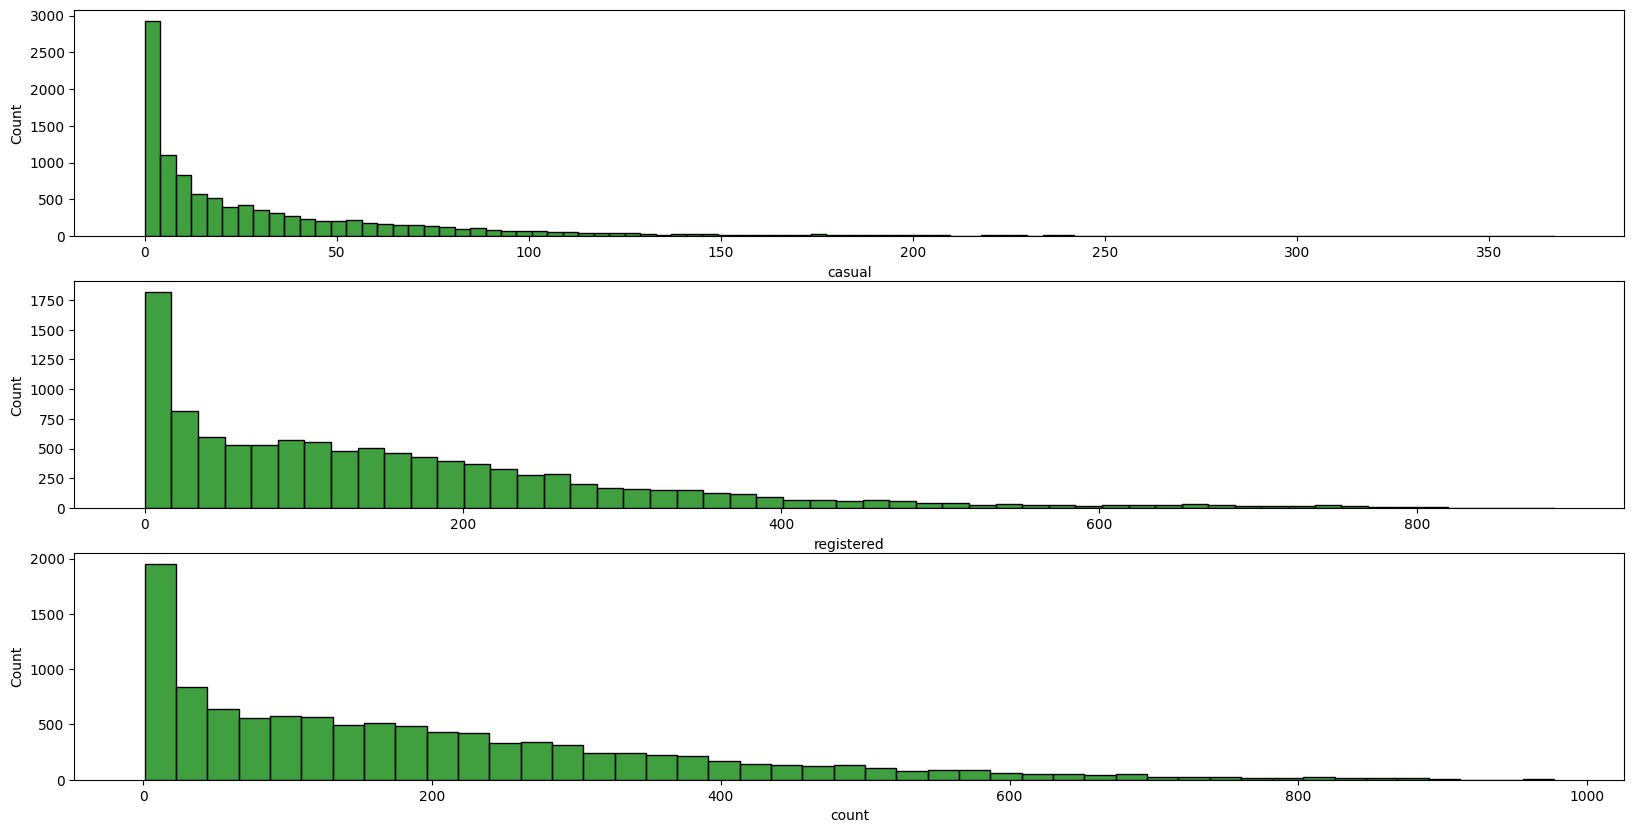

In [ ]:
plt.figure(figsize=(20,10))
bins='auto'
plt.subplot(3,1,1)
sns.histplot(x=df['casual'],color='green',bins=bins)
plt.subplot(3,1,2)
sns.histplot(x=df['registered'],color="green",bins=bins)
plt.subplot(3,1,3)
sns.histplot(x=df['count'],color="green",bins=bins)

plt.show()

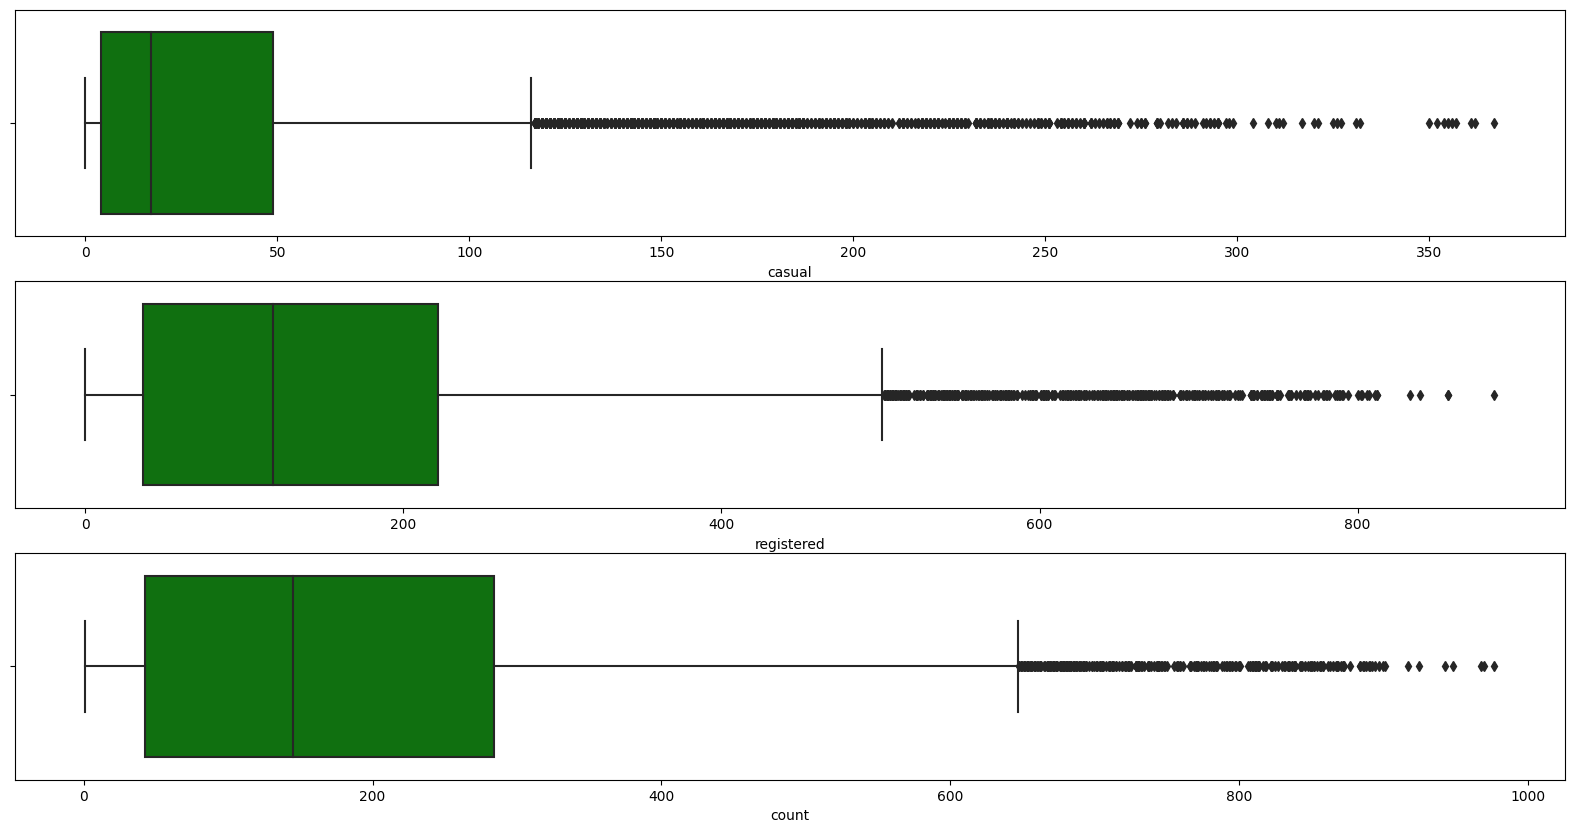

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
sns.boxplot(x=df['casual'],color='green')
plt.subplot(3,1,2)
sns.boxplot(x=df['registered'],color='green')
plt.subplot(3,1,3)
sns.boxplot(x=df['count'],color='green')

plt.show()

<ipython-input-50-151c1d666eb1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


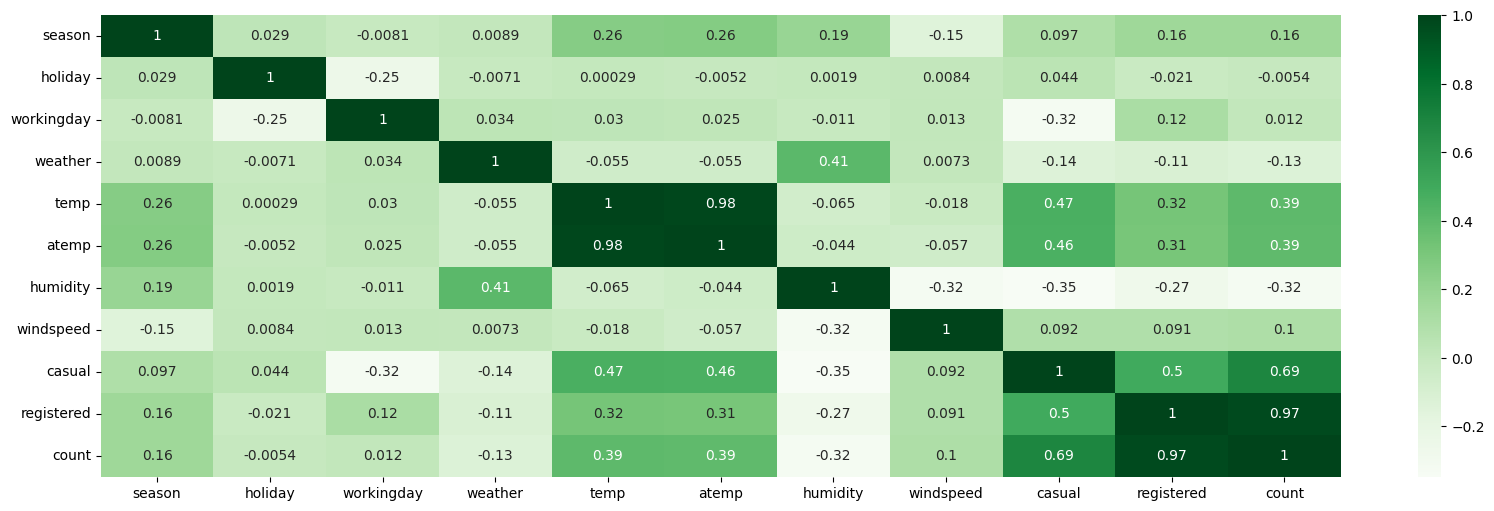

In [ ]:
plt.figure(figsize=(20,6))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

- There is strong positive correlation between count with "registered"
- There is also somewhat a strong positive relation between "count" and "temp(0.39)/atemp(0.38)" which suggests that as the temperature increases, the count also increases


## Hypothesis Testing -1





**Null Hypothesis(H0):** Working day has no effect on the number of cycles being rented.

**Alternate Hypothesis(H1):** Working day has effect on the number of cycles being rented.

**Significance level (alpha):** 0.05

We will use the 2-Sample T-Test to test the hypothess defined above

In [ ]:
d1 = df[df['workingday']==0]['count']
d2 = df[df['workingday']==1]['count']

In [ ]:

print('Average booking with no working day : {}'.format(d1.mean()))
print('Average booking with working day: {}'.format(d2.mean()))

Average booking with no working day : 188.50662061024755
Average booking with working day: 193.01187263896384


H0: the avg with working day <= the avg with no working day

H1: the avg with working day > the avg with no working day

In [ ]:
t_stat,p_value=ttest_ind(d2,d1,alternative='greater')

In [ ]:
alpha=0.05
if p_value<alpha:
  print("Reject null hypo p-value: {}< alpha: {}".format(p_value, alpha))
else:
  print("Failed to reject null hypo p-value: {}> alpha: {}".format(p_value, alpha))

Failed to reject null hypo p-value: 0.11322402113180674> alpha: 0.05


Since, we are failed to reject null hypothesis.

Therefore, the average booking with working day <= the average with no working day.

Hence, working day has no effect on the number of cycles being rented

## **Hypothesis Testing -2**

**H0(Null Hypothesis)**: No. of cycles rented is similar in different weather

**H1(Alternate Hypothesis)**: No. of cycles rented is different in different weather

**Alpha**=0.05

In [ ]:
#To check if No. of cycles rented is similar or different in different weather
gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

In [ ]:
f_oneway(gp1,gp2,gp3,gp4)
alpha=0.05

if p_value<alpha:
  print("Reject null hypo p-value: {}< alpha: {}".format(p_value, alpha))
else:
  print("Failed to reject null hypo p-value: {}> alpha: {}".format(p_value, alpha))

Failed to reject null hypo p-value: 0.11322402113180674> alpha: 0.05


Since pvalue > alpha, therefore No. of cycles rented is similar in different weather

<Axes: xlabel='weather', ylabel='count'>

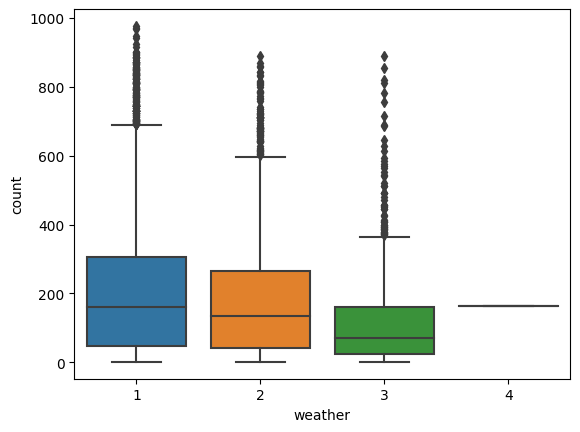

In [ ]:
sns.boxplot(data=df,x='weather',y='count')

<ipython-input-58-0ed87cb7adba>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = df, x = 'count', hue = 'weather', kind = 'kde')


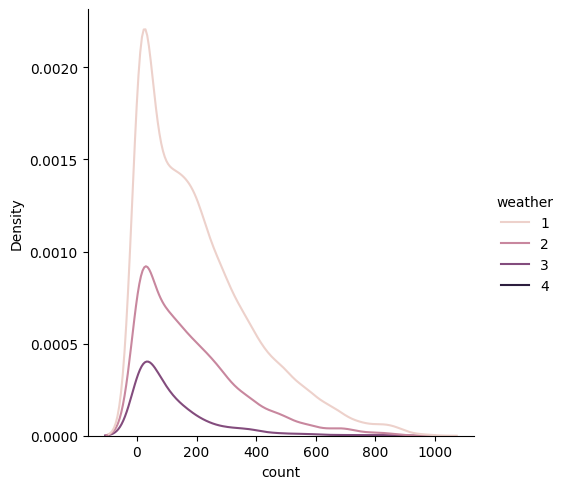

In [ ]:
sns.displot(data = df, x = 'count', hue = 'weather', kind = 'kde')
plt.show()


**H0(Null Hypothesis)**: No. of cycles rented is similar in different season

**H1(Alternate Hypothesis)**: No. of cycles rented is different in different season

**Alpha**=0.05

In [ ]:
#to check if the demand of bicycles on rent is the same for different Seasons

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values

In [ ]:
f_oneway(gp5,gp6,gp7,gp8)
alpha=0.05

if p_value<alpha:
  print("Reject null hypo p-value: {}< alpha: {}".format(p_value, alpha))
else:
  print("Failed to reject null hypo p-value: {}> alpha: {}".format(p_value, alpha))

Failed to reject null hypo p-value: 0.11322402113180674> alpha: 0.05


Since pvalue > alpha, therefore No. of cycles rented is similar in different season

<Axes: xlabel='season', ylabel='count'>

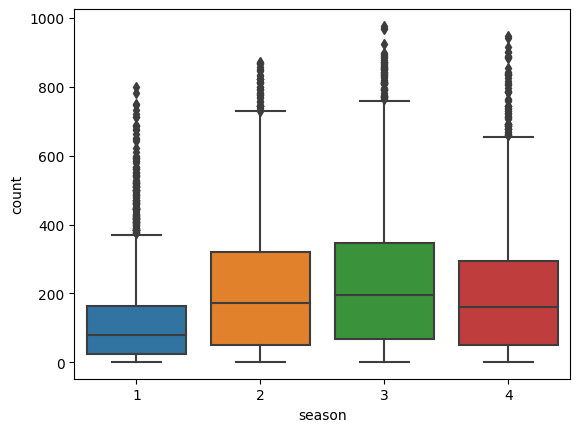

In [ ]:
sns.boxplot(data=df,x='season',y='count')

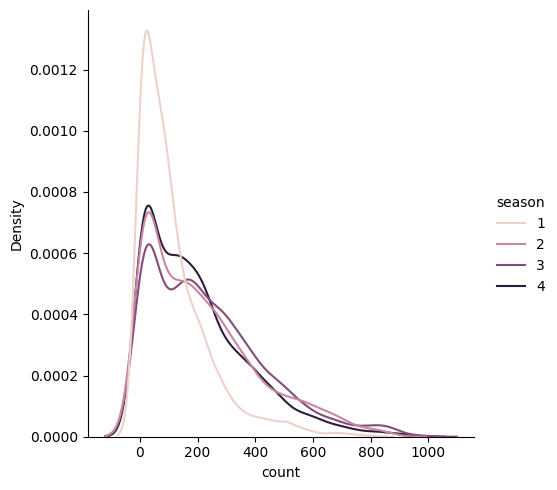

In [ ]:
sns.displot(data = df, x = 'count', hue = 'season', kind = 'kde')
plt.show()

## **Hypothesis Testing -4**


**Null Hypothesis (H0)**: Weather is independent of the season

**Alternate Hypothesis (H1)**: Weather is not independent of the season

**Significance level (alpha)** : 0.05

We will use **chi-square test** to test hypyothesis defined above.

In [ ]:
chi2_contingency?

In [ ]:

ob=pd.crosstab(df["season"],df["weather"])

In [ ]:
chistat,p,df,expected=chi2_contingency(ob)

if p<0.05:
  print("Reject Null - Weather is not independent of the season",p)
else:
  print("Failed to reject null - Weather is independent of the season",p)

Reject Null - Weather is not independent of the season 1.549925073686492e-07


In [ ]:
chistat

49.158655596893624

In [ ]:
p

1.549925073686492e-07

In [ ]:
df

9

In [ ]:
expected

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

Recommendations:
- In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temprature is less than 10 or in very cold days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.